In [ ]:
import sys, os
import cv2
import copy
import matplotlib.pyplot as plt
import numpy as np
import glob


np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
util_path = os.path.abspath("../utils/")
sys.path.append(util_path)
import color_seg as seg



In [6]:
image_folder = "/mnt/data1/act/target_seg_data/train/"
image_paths = glob.glob(image_folder + "*.jpg")
image_paths.sort()
image_paths

['/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00000.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00001.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00002.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00003.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00004.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00005.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00006.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00007.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00008.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00009.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00010.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00011.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00012.jpg',
 '/mnt/data1/act/target_seg_data/train/episode_100_

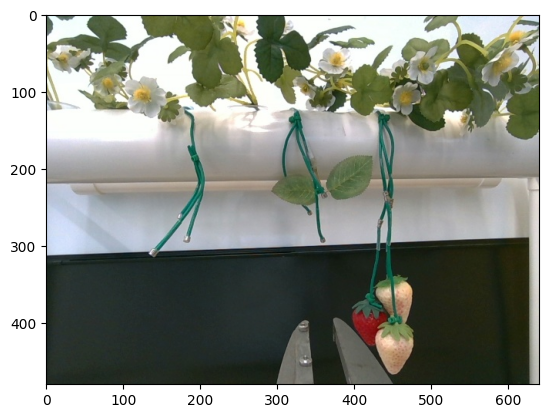

In [14]:
idx = 0 
image_path = image_paths[idx]
img_rgb = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

roi_mean [139.83333333  26.30666667  31.17333333 147.52       207.39333333
 139.83333333]
roi_std [ 6.57816253  7.12642656  7.77409945 67.53445738 11.85461748  6.57816253]


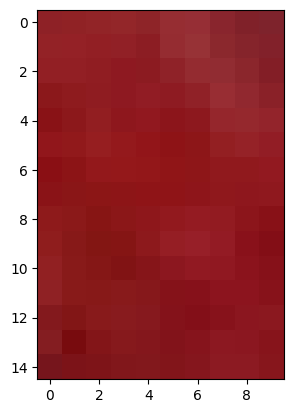

In [20]:
roi = img_rgb[395:410,405:415, :]
roi_mean, roi_std =  seg.get_center_std(roi)
print("roi_mean", roi_mean)
print("roi_std", roi_std)

plt.imshow(roi)

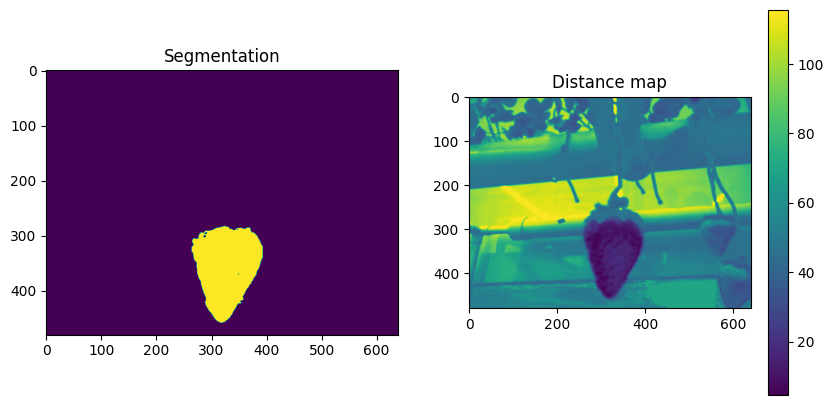

In [31]:
# Load image
threshold = 20
segmentation, distance_map = seg.segment(img_rgb, roi_mean, roi_std, threshold, var_weighting=False)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(segmentation)
axs[0].set_title("Segmentation")
axs[1].imshow(distance_map)
axs[1].set_title("Distance map")
# add colorbar
plt.colorbar(axs[1].imshow(distance_map), ax=axs[1])

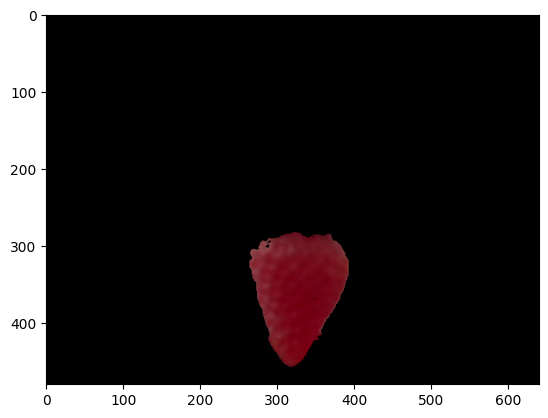

In [32]:
seg_img = copy.deepcopy(img_rgb)
seg_img[segmentation == 0] = 0
plt.imshow(seg_img)

### Batch Process Generation

In [33]:
save_folder = "/mnt/data1/act/target_seg_data/train/color_seg"

In [34]:
for i in range(len(image_paths)):
    image_path = image_paths[i]
    img_rgb = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
    segmentation, distance_map = seg.segment(img_rgb, roi_mean, roi_std, threshold, var_weighting=False)
    seg_img = copy.deepcopy(img_rgb)
    seg_img[segmentation == 0] = 0
    save_path = os.path.join(save_folder, os.path.basename(image_path))
    print(save_path)
    cv2.imwrite(save_path, cv2.cvtColor(seg_img, cv2.COLOR_RGB2BGR))
    

/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00000.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00001.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00002.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00003.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00004.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00005.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00006.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00007.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00008.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00009.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00010.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episode_100_val_wrist_00011.jpg
/mnt/data1/act/target_seg_data/train/color_seg/episo

In [40]:
i = 2
image_path = image_paths[i]
print(image_path)
img_rgb = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

/mnt/data1/act/target_seg_data/train/episode_100_val_wrist_00002.jpg


In [41]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 50]
result, encoded_image = cv2.imencode('.jpg', img_rgb, encode_param)


In [44]:
decompressed_image = cv2.imdecode(encoded_image, 1)
decompressed_image.shape

(480, 640, 3)

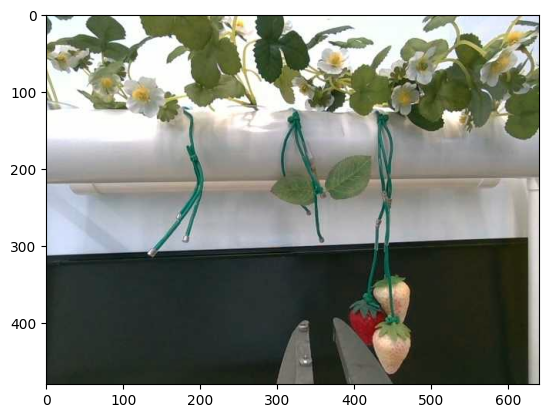

In [45]:
plt.imshow(decompressed_image)